In [1]:
import string
import re

In [2]:
file = open('data\JuliusCaesar.txt','r',encoding='utf8')
JuliusCaesar = file.read()
file.close()

In [3]:
JuliusCaesar = JuliusCaesar.encode('ascii','ignore')

In [4]:
JuliusCaesar = JuliusCaesar.decode()

In [5]:
JuliusCaesar = JuliusCaesar.replace('\n',' ')

In [6]:
JuliusCaesar = re.sub(' +',' ',JuliusCaesar)

In [7]:
JuliusCaesar = JuliusCaesar.lower()

In [8]:
table=str.maketrans('','',string.punctuation)
JuliusCaesar = [w.translate(table) for w in JuliusCaesar.split()]

In [9]:
import pickle
fd = open('data\stopwords.pkl','rb')
stop_words = pickle.load(fd)
fd.close()

In [10]:
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [11]:
for word in list(JuliusCaesar):
    if word in stop_words:
        JuliusCaesar.remove(word)

In [12]:
worddict = dict()

In [13]:
worddict

{}

In [14]:
from collections import Counter
worddict = Counter(JuliusCaesar)


In [15]:
worddict = dict(worddict)

In [16]:
topwords = sorted(worddict, key = worddict.get, reverse=True)
top20 = topwords[:20]
for word in top20:
    print(word, worddict[word])

brutus 371
caesar 237
cassius 229
antony 127
shall 125
thou 116
casca 74
come 74
good 69
citizen 69
know 68
men 65
well 65
let 63
us 63
lucius 59
enter 57
man 56
thy 54
thee 54


In [17]:
top = dict()

In [18]:
for i in top20:
    top[i]=worddict[i]

In [19]:
top

{'brutus': 371,
 'caesar': 237,
 'cassius': 229,
 'antony': 127,
 'shall': 125,
 'thou': 116,
 'casca': 74,
 'come': 74,
 'good': 69,
 'citizen': 69,
 'know': 68,
 'men': 65,
 'well': 65,
 'let': 63,
 'us': 63,
 'lucius': 59,
 'enter': 57,
 'man': 56,
 'thy': 54,
 'thee': 54}

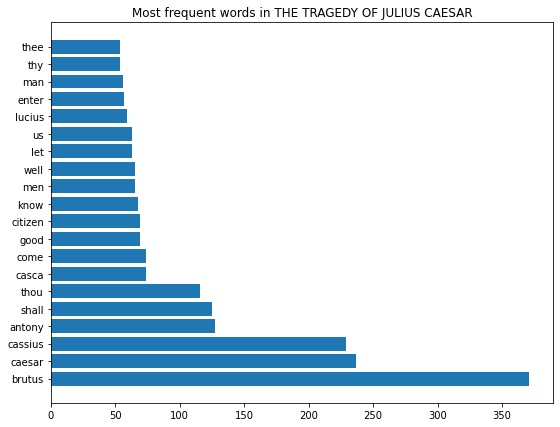

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# ask matplotlib to plot in notebooks
%matplotlib inline
fig, ax = plt.subplots(figsize=(9, 7))
pos = range(len(top20))
ax.barh(pos, [worddict[word] for word in top20],
                     align='center',
                     tick_label=top20)
ax.set_title('Most frequent words in THE TRAGEDY OF JULIUS CAESAR')
plt.savefig('HW_1.jpg')

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np

In [22]:
df = pd.DataFrame(list(top.items()),columns=('word','count'))

In [23]:
df.set_index('word',inplace=True)

In [24]:
df

,count
word,
brutus,371
caesar,237
cassius,229
antony,127
shall,125
thou,116
casca,74
come,74
good,69


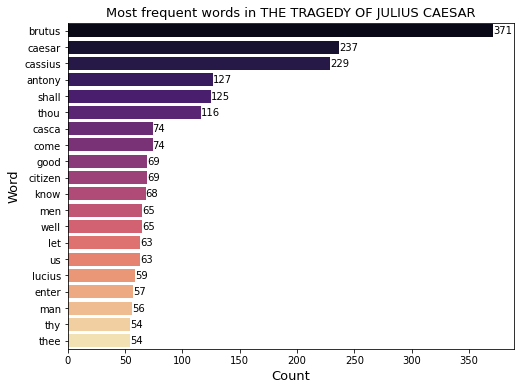

In [25]:
plt.figure(figsize=(8,6))

ax = sns.barplot(data=df.transpose(),orient='h',palette='magma')
for p in ax.patches:
    width = p.get_width()
    plt.text(0+width,p.get_y()+0.5*p.get_height(),
             '{:1.0f}'.format(width),ha='left',va='center')
ax.set_ylabel('Word',fontdict={'size':13})
ax.set_xlabel('Count',fontdict={'size':13})
ax.set_title('Most frequent words in THE TRAGEDY OF JULIUS CAESAR',fontdict={'size':13})
plt.savefig('HW_2.jpg')